In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import re

In [2]:
train_df = pd.read_csv("https://raw.githubusercontent.com/csabi0312/DeepLProject/main/train.csv",index_col=0)
train_df.sample(3)

,prompt,A,B,C,D,E,answer
id,,,,,,,
181,What is the relationship between the Hamiltoni...,"For every eigenstate of one Hamiltonian, its p...","For every eigenstate of one Hamiltonian, its p...","For every eigenstate of one Hamiltonian, its p...","For every eigenstate of one Hamiltonian, its p...","For every eigenstate of one Hamiltonian, its p...",A
132,What is the main factor that determines the oc...,The star's distance from Earth,The star's age,The star's temperature,The star's luminosity,The progenitor star's metallicity,E
87,Which hand should be used to apply the right-h...,One's dominant hand,The right hand,Both hands,The left hand,Either hand,B


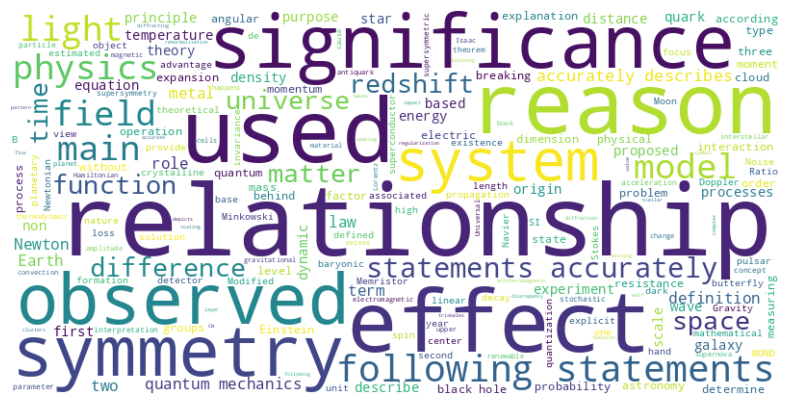

In [3]:
# Word cloud of questions
text_data = train_df['prompt'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


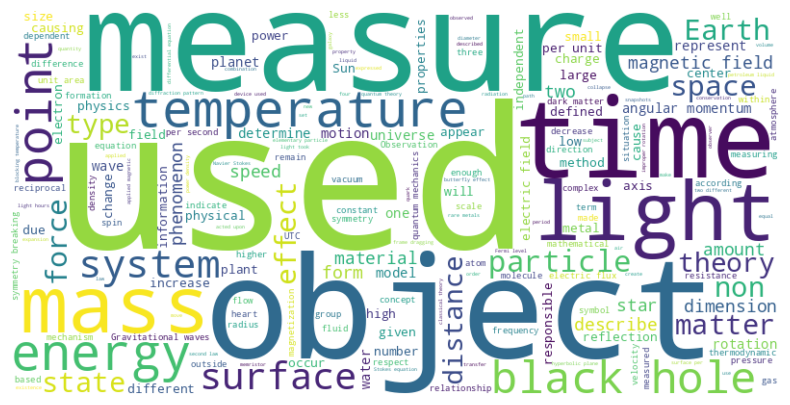

In [4]:
# Word cloud of answers
text_data = train_df[['A', 'B', 'C', 'D', 'E']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [5]:
df = pd.DataFrame(train_df['prompt'])

# Define functions to categorize questions
def categorize_question_type(question):
    if re.search(r'\bWhat is\b', question, re.IGNORECASE):
        return 'What is'
    elif re.search(r'\bWhat are\b', question, re.IGNORECASE):
        return 'What are'
    elif re.search(r'\bWhat was\b', question, re.IGNORECASE):
        return 'What was'
    elif re.search(r'\bWhat did\b', question, re.IGNORECASE):
        return 'What did'
    elif re.search(r'\bWhat can\b', question, re.IGNORECASE):
        return 'What can'
    elif re.search(r'\bWhat does\b', question, re.IGNORECASE):
        return 'What does'
    elif re.search(r'\bWhat happens\b', question, re.IGNORECASE):
        return 'What happens'
    elif re.search(r'\bWhy\b', question, re.IGNORECASE):
        return 'Why'
    elif re.search(r'\bHow\b', question, re.IGNORECASE):
        return 'How'
    elif re.search(r'\bWhich\b', question, re.IGNORECASE):
        return 'Which'
    elif re.search(r'\bWho\b', question, re.IGNORECASE):
        return 'Who'
    else:
        print(question)
        return 'Other'

# Apply the function to categorize questions and create a new column 'question_type'
df['question_type'] = df['prompt'].apply(categorize_question_type)

# Count the questions by type
question_counts = df['question_type'].value_counts()

# Print the question counts
print(question_counts)

What is         160
Which            11
What are          9
Who               7
What did          4
What was          3
How               2
What happens      2
What does         1
What can          1
Name: question_type, dtype: int64


In [6]:
# Create a histogram of the types of questions
fig = px.histogram(df, x='question_type', nbins=10, text_auto=True)

# Rotate the x-axis ticks
#fig.update_layout(xaxis_tickangle=-30)

# Show the plot
fig.show()
